# **Spam Ham Detection Using BERT and Tensorflow**

##### <u>**Project Summary**</u>

##### <u>**GitHub Link**</u>
[Click Here](https://github.com/ajitmane36/spam-ham-detection-bert-tensorflow.git)

##### <u>**Problem Statement**</u>

- The data is related to the classification of emails into spam or ham (non-spam). The goal of this project is to develop a model using BERT and TensorFlow to predict whether an email is spam or not based on its content. By fine-tuning a pre-trained BERT model, the objective is to enhance the accuracy and efficiency of email classification, ensuring that legitimate emails are delivered to the inbox while spam is effectively filtered out.

##### <u>**Data Description**</u>

- **Message**: Description of the email content (text).
- **Category**: Indicates whether the email is spam (1) or not (0).

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing tensorflow libraries for BERT
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Registers the ops.

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Dataset Loading
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/spam_emails_data.csv")
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
# Fist five observations
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Last five observations
df.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


##### <u>**Data Inispection**</u>

In [6]:
# Shape of dataset
df.shape
print(f'Dataset has {df.shape[0]} observations and {df.shape[1]} columns.')

Dataset has 5572 observations and 2 columns.


In [7]:
# Dataset columns
print(df.columns.tolist())

['Category', 'Message']


In [8]:
# Basic information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# Basic description of dataset
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

- Dataset having 4825 Ham observations and 747 spam observations.
- Class imbalance seen.

##### <u>**Data Wrangling**</u>

In [10]:
# Cehcking  duplicates value in each feature
duplicates_df=pd.DataFrame({'columns':df.columns, 'number_of_duplicates': df.duplicated().sum()}).sort_values(by='number_of_duplicates', ascending=False)
print(duplicates_df)
print(f'Dataset having {df.duplicated().sum()} duplicates values.')

    columns  number_of_duplicates
0  Category                   415
1   Message                   415
Dataset having 415 duplicates values.


In [11]:
# Removing duplicates
df.drop_duplicates(inplace=True)
df.shape

(5157, 2)

In [12]:
# Checking missing values
null_df=pd.DataFrame({'columns': df.columns, 'num_of_nulls': df.isna().sum()})
print(null_df )
print(f'Dataset have {df.isna().sum()} null values.')

           columns  num_of_nulls
Category  Category             0
Message    Message             0
Dataset have Category    0
Message     0
dtype: int64 null values.


##### <u>**Exploratory Data Analysis**</u>

In [13]:
# Min and Max length of email
print("Smallest email")
print('__'*50)
print(df.Message.min())
print(f'Length: {len(df.Message.min())}')
print('=='*50)
print("Largest email")
print('__'*50)
print(df.Message.max())
print(f'Length: {len(df.Message.max())}')

Smallest email
____________________________________________________________________________________________________
#ERROR!
Length: 7
Largest email
____________________________________________________________________________________________________
… we r stayin here an extra week, back next wed. How did we do in the rugby this weekend? Hi to and and , c u soon "
Length: 116


In [14]:
# Defining a function to Notate the percent count of each value on the bars
def annot_percent(axes):
    '''Takes axes as input and labels the percent count of each bar in a countplot'''
    for p in plot.patches:
        total = sum(p.get_height() for p in plot.patches)/100
        percent = round((p.get_height()/total),2)
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        plot.annotate(f'{percent}%', (x, y), ha='center', va='bottom')

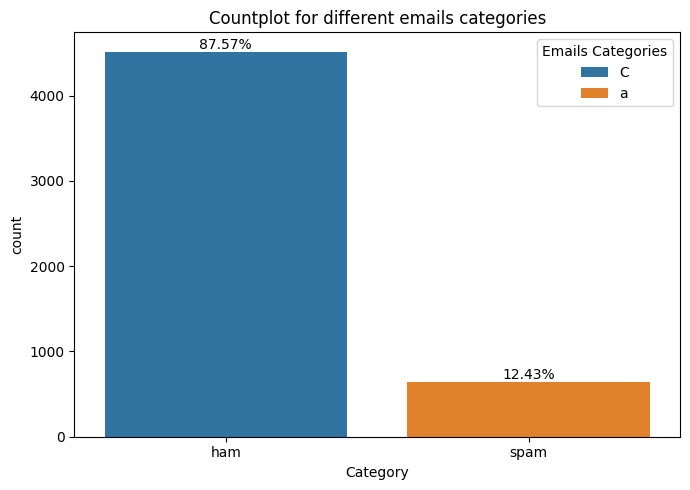

In [15]:
# Bar plot for diffrent categories of email
plt.figure(figsize=(7,5))
plot=plt.subplot(111)
ax=sns.countplot(x=df.Category, hue=df.Category)
ax.set_title('Countplot for different emails categories')
ax.legend('Category', title='Emails Categories')
annot_percent(plot)
plt.tight_layout()
plt.show()

- Dataset have 12.43% of spam and 87.57% ham observations.
- Class imbalnce seen.

In [16]:
# Length of each emial
df['length']=df['Message'].apply(lambda x:len(x))
df.head()

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


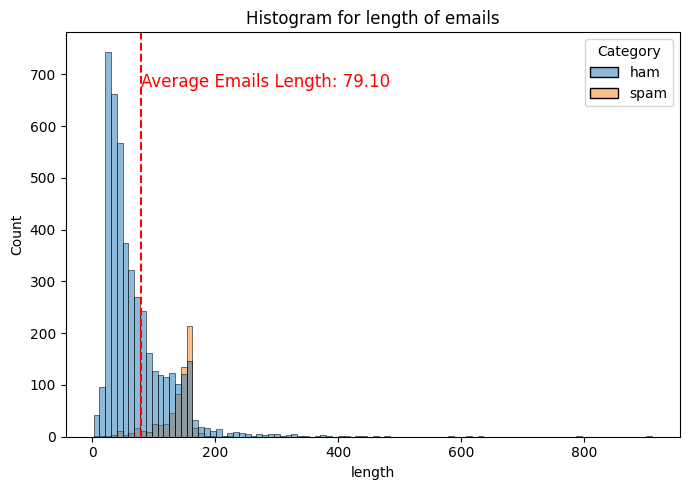

In [17]:
# Plot histogram for length of emails
plt.figure(figsize=(7,5))
ax=sns.histplot(x=df.length, hue=df.Category)
ax.set_title('Histogram for length of emails')
ax.axvline(df.length.mean(), color='r', linestyle='--')
ax.text(df.length.mean(), ax.get_ylim()[1]*0.9, f'Average Emails Length: {df.length.mean():.2f}',
        color='red', ha='left', va='top', fontsize=12)
plt.tight_layout()
plt.show()

- The average email length seen is 79.
- The majority of emails are shorter than 200 characters.

##### <u>**Feature Engineering & Data Pre-processing**</u>

In [18]:
# Dataset look
df

,Category,Message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160
5568,ham,Will ü b going to esplanade fr home?,36
5569,ham,"Pity, * was in mood for that. So...any other s...",57
5570,ham,The guy did some bitching but I acted like i'd...,125


In [19]:
# Dropping unnecessary 'length' feature
df.drop(columns='length', inplace=True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [20]:
# Check category in 'Category' feature
df.Category.unique()

array(['ham', 'spam'], dtype=object)

In [21]:
# Categorical encoding for 'Category' feature
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [22]:
# Separating dependant and independant varibale

# Independant feature
X=df['Message'].copy()
# Dependant feature
y=df['spam'].copy()

In [23]:
# Splitting dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [24]:
 # Shape of splits
print(f'X_train: {X_train.shape}')
print(f'X_test: {X_test.shape}')

X_train: (4125,)
X_test: (1032,)


In [25]:
# Download BERT preprocessing and encoder model from tensorflow hub
preprocessor = hub.KerasLayer(
    "https://kaggle.com/models/tensorflow/bert/TensorFlow2/en-uncased-preprocess/3")
encoder = hub.KerasLayer(
    "https://www.kaggle.com/models/tensorflow/bert/TensorFlow2/bert-en-uncased-l-12-h-768-a-12/2",
    trainable=True)

In [26]:
# Cecking word embedding for downloaded BERT model
def get_sentence_embedding(sentence):
  preprocessed_text=preprocessor(sentence)
  return encoder(preprocessed_text)['pooled_output']

In [27]:
get_sentence_embedding(X_train.iloc[0:2])

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[ 0.04723123, -0.4236796 ,  0.93839973, ..., -0.97888464,
         0.11380111,  0.98792154],
       [-0.16416186, -0.53803474,  0.7560487 , ..., -0.99828386,
         0.44655553,  0.85816693]], dtype=float32)>

In [28]:
embedding_vectors=get_sentence_embedding(['Ajit','Rahul','Hi, How are you?'])
embedding_vectors

<tf.Tensor: shape=(3, 768), dtype=float32, numpy=
array([[ 0.03212716, -0.29196966,  0.501561  , ..., -0.9835753 ,
         0.3439503 ,  0.9943866 ],
       [-0.2545325 , -0.5839901 , -0.24403441, ..., -0.9916759 ,
         0.80693036,  0.9891788 ],
       [ 0.05178628, -0.6347297 ,  0.8443709 , ..., -0.93730456,
         0.47653258,  0.98339635]], dtype=float32)>

In [29]:
# Checking its similarities between Ajit and Rahul
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([embedding_vectors[0]],[embedding_vectors[1]])

array([[0.6735264]], dtype=float32)

#### **<u>Model Development<u/>**

In [30]:
# Define the input shape
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')

# Preprocess the input text
preprocessed_text = preprocessor(text_input)

# Encode the preprocessed text
outputs = encoder(preprocessed_text)

# Add a dropout layer to handle overfitting
l = tf.keras.layers.Dropout(0.3)(outputs['pooled_output']) # 30% neurons dropped to avoid overfitting

# Add a dense layer with sigmoid activation
l = tf.keras.layers.Dense(1, activation='sigmoid', name='output')(l)

# Create the model
model = tf.keras.Model(inputs=text_input, outputs=l)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_word_ids': (None,    0         ['text[0][0]']                
                             128),                                                                
                              'input_type_ids': (None,                                            
                             128),                                                                
                              'input_mask': (None, 128)                                           
                             }                                                                

In [ ]:
# Model fitting to the data
#model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))
model.fit(X_train, y_train) # For small computation resources

 10/129 [=>............................] - ETA: 1:42:34 - loss: 0.8702 - accuracy: 0.7937

#### **<u>Model Evalution</u>**

In [ ]:
# Model evaluation
model.evaluate(X_test,y_test)

# To save this aprroch you need use all this proportion for this one and handle this one
